<font size=4 color="08#0000" face="Times New Roman">Regression of Python</font>


<font size=3 face="times new roman">The linear regression assumes the linear relationship between the dependent variable and the independent variable. But in reality, it may not true.In order to  improve the drawbacks, the polynomial regression is used, but in the same time, another problem **"overfitting"** comes out. The problem is that our model performs well in the sample data set, while performs badly in another data set. In this section, we are going to introduce the following methods.<br />
   1、Linear Regression<br />
   2、Polynomial Regression<br />
   3、Spline Regression.<br/>

The coding is refered to https://blog.csdn.net/tMb8Z9Vdm66wH68VX1/article/details/79922750</font> 

<font size=3 face="times new roman">**Import Data**<font>

In [297]:
import os
import pandas as pd
import numpy as np
os.chdir("D:\各种材料\研究生\公众号\三、美林时钟模型")
data= pd.read_excel(r"D:\各种材料\研究生\公众号\三、美林时钟模型\模型改进的探索.xlsx")

In [298]:
data=data.dropna(0)
data.index=data['日期']
del data['日期']
data

,M2:同比,CPI:当月同比,宏观经济景气指数:一致指数,宏观经济景气指数:先行指数,美元指数,中债国债到期收益率:3个月
日期,,,,,,
2002-01-31,13.1,-1.0,94.93,100.72,-5.00,2.2285
2002-02-28,13.0,0.0,95.01,100.75,-4.70,1.9435
2002-03-31,14.4,-0.8,95.45,100.67,-4.50,1.7682
2002-04-30,14.1,-1.3,96.54,100.71,-3.38,1.8773
2002-05-31,14.0,-1.1,96.98,100.82,-2.74,1.7988
...,...,...,...,...,...,...
2019-06-30,8.5,2.7,97.20,101.40,-0.30,2.1870
2019-07-31,8.1,2.8,96.90,101.30,-0.70,2.3100
2019-08-31,8.2,2.8,96.60,101.30,-1.30,2.4480


<font size=3 >对数据进行标准化处理</font>

In [350]:
data=(data-data.mean())/data.std()
data.head()

,M2:同比,CPI:当月同比,宏观经济景气指数:一致指数,宏观经济景气指数:先行指数,美元指数,中债国债到期收益率:3个月
日期,,,,,,
2002-01-31,-0.459201,-1.704478,-1.773424,-0.531878,-1.285579,-0.245275
2002-02-28,-0.480646,-1.203487,-1.743817,-0.515870,-1.229664,-0.632894
2002-03-31,-0.180418,-1.604280,-1.580977,-0.558558,-1.192387,-0.871314
2002-04-30,-0.244752,-1.854776,-1.177580,-0.537214,-0.983639,-0.722931
2002-05-31,-0.266197,-1.754577,-1.014741,-0.478518,-0.864354,-0.829696


In [300]:
import statsmodels.api as sm
import matplotlib.pyplot as plt 

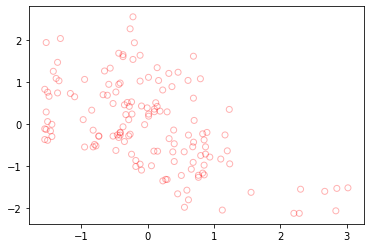

In [301]:
data_y=data['中债国债到期收益率:3个月']
data_x=data['M2:同比']
#将数据划分为训练集和验证集
from sklearn.model_selection import train_test_split  
train_x,valid_x,train_y,valid_y=train_test_split(data_x,data_y, test_size=0.33,random_state=1) #将原始数据1/3作为测试集，2/3作为训练集。
import matplotlib.pyplot as plt
plt.scatter(train_x, train_y, facecolor='None', edgecolor='r', alpha=0.3) 
plt.show()

In [302]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
train_x1=np.array(train_x)
train_y1=np.array(train_y)
train_x1=train_x1.reshape(-1,1)
train_y1=train_y1.reshape(-1,1)
model.fit(train_x1,train_y1)
print (model.coef_)#回归的系数
print(model.intercept_)#回归的截距项

[[-0.56591291]]
[-0.03635794]


In [306]:
valid_x1=(np.array(valid_x)).reshape(-1,1)
valid_y1=(np.array(valid_y)).reshape(-1,1)
pred1=model.predict(valid_x1)

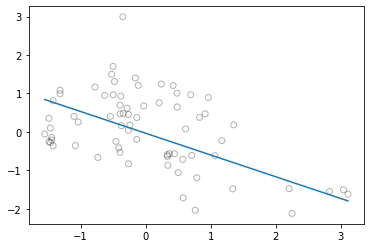

In [307]:
xp= np.linspace(valid_x1.min(),valid_x1.max(),70)
xp= xp.reshape(-1,1)
pred_plot= model.predict(xp)
plt.scatter(valid_x1,valid_y1, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp,pred_plot)
plt.show()

In [219]:
#计算mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt 
rms=sqrt(mean_squared_error(valid_y,pre))
print(rms)

0.8682218251307515


<font size=4 color="08#0000" face=times new roman>多项式回归</font>

In [309]:
train_x

日期
2006-06-30    0.683811
2011-03-31    0.291370
2014-07-31   -0.373421
2014-02-28   -0.416311
2009-12-31    2.667462
                ...   
2018-12-31   -1.531445
2013-06-30   -0.266197
2008-01-31    0.793180
2013-09-30   -0.223307
2005-02-28   -0.287642
Name: M2:同比, Length: 143, dtype: float64

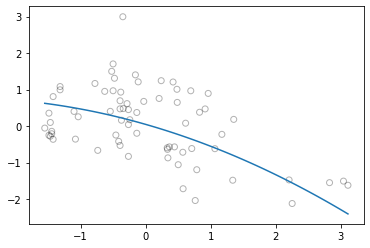

In [311]:
train_x2=[]
[train_x2.append(item[0])  for item in train_x1]
train_y2=[]
[train_y2.append(item[0])  for item in train_y1] #transfer the original(2D) to 1D
weights= np.polyfit(train_x2,train_y2,2)# return the regression coef,从最高次到零次。
model=np.poly1d(weights)#生成给定系数的多项式。
xp2=np.linspace(valid_x.min(),valid_x.max(),70)
pred2_plot=model(xp2)
plt.scatter(valid_x,valid_y,facecolor='None', edgecolor='k',alpha=0.3)
plt.plot(xp2,pred2_plot)
plt.show()

<font size=4 face="宋体" color="08#0000">**样条回归**</font>

<font size=3 face="宋体"> 与上述两种回归不同，样条回归并没有将模型运用到整个数据集中，而是将数据集划分为多个区间，为每个区间单独拟合一个模型，可以用分段函数对每个区间的模型进行建模。</font>

<font size=3 face="宋体">**分段函数** </br>
首先需要将数据集分成K份，让然后构造K个示性函数，即在某段上取1，其他的区域为0，这样就形成了自变量范围上的所有基函数。
</font>

In [320]:
type(df_cut)

pandas.core.arrays.categorical.Categorical

In [348]:
df_cut,bins=pd.cut(train_x2,4,retbins=True, right= True)#df_cut记录了每个样本点所在的区间，bins记录区间端点。
df_cut.value_counts()#获得每个区间的样本数
df_cut=pd.DataFrame(df_cut,index=train_x.index)
df_steps=pd.concat([train_x,df_cut,train_y],axis=1)
df_steps.columns=["M2","M2_Cut","利率"]
df_steps

,M2,M2_Cut,利率
日期,,,
2006-06-30,0.683811,"(-0.41, 0.732]",-0.916468
2011-03-31,0.291370,"(-0.41, 0.732]",0.284335
2014-07-31,-0.373421,"(-0.41, 0.732]",1.597209
2014-02-28,-0.416311,"(-1.557, -0.41]",0.969673
2009-12-31,2.667462,"(1.875, 3.017]",-1.605206
...,...,...,...
2018-12-31,-1.531445,"(-1.557, -0.41]",0.280799
2013-06-30,-0.266197,"(-0.41, 0.732]",2.258065
2008-01-31,0.793180,"(0.732, 1.875]",1.070590


In [349]:
df_steps_dummies = pd.get_dummies(df_cut)##df_cut中就包含了所有的标签，相当于判断dataframe中每个元素属于哪一个标签
df_steps_dummies.head()

,"0_(-1.557, -0.41]","0_(-0.41, 0.732]","0_(0.732, 1.875]","0_(1.875, 3.017]"
日期,,,,
2006-06-30,0,1,0,0
2011-03-31,0,1,0,0
2014-07-31,0,1,0,0
2014-02-28,1,0,0,0
2009-12-31,0,0,0,1


In [369]:
df_steps_dummies.columns=["-1.557- -0.47","-0.47-0.732","0.732-1.875","1.875-3.017"]
fit3 = sm.GLM(df_steps.利率, df_steps_dummies).fit()#广义线性模型
bin_mapping = np.digitize(valid_x, bins) #返回valid_x（测试值）所在区间的位序
X_valid=pd.get_dummies(bin_mapping)
#X_valid = pd.get_dummies(bin_mapping)
X_valid=pd.get_dummies(bin_mapping).drop([5],axis=1)#去掉离群点
pred3=fit3.predict(X_valid)

0     0.060830
1     0.376409
2    -0.723107
3    -0.723107
4    -0.723107
        ...   
66    0.376409
67    0.060830
68    0.376409
69    0.060830
70    0.060830
Length: 71, dtype: float64

In [371]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms3= sqrt(mean_squared_error(valid_y,pred3))
print(rms3)

0.8715590398957489


D:\Software Download\Ananconda\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Software Download\Ananconda\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Software Download\Ananconda\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21033 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Software Download\Ananconda\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0, flags=flags)


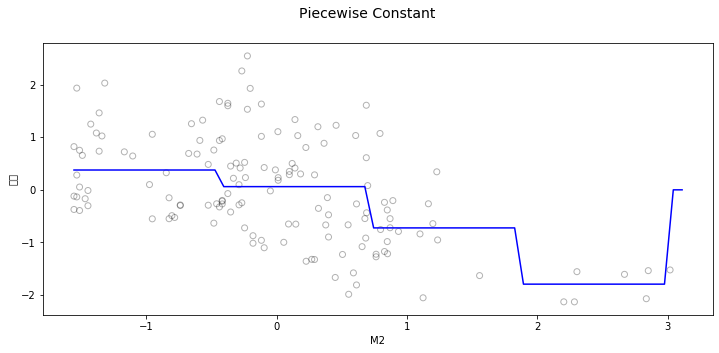

In [378]:
xp3=np.linspace(valid_x.min(),valid_x.max(),70)
bin_mapping=np.digitize(xp3,bins)
X_valid3=pd.get_dummies(bin_mapping)
X_valid3=pd.get_dummies(bin_mapping).drop([5],axis=1)#去掉离群点
pred3=fit3.predict(X_valid3)

#进行可视化
fig,(ax1) = plt.subplots(1,1, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)#画出样条回归的散点图
ax1.scatter(train_x,train_y, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(xp3,pred3, c='b')
ax1.set_xlabel('M2')
ax1.set_ylabel('利率')
plt.show()
